Performance of Sparse Recovery Using L1 Minimization
====================================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This tour explores theoritical garantees for the performance of recovery
using $\ell^1$ minimization.

In [1]:
using PyPlot
using NtToolBox
using Autoreload
arequire("NtToolBox")

  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:12
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  like

Sparse $\ell^1$ Recovery
--------------------------
We consider the inverse problem of estimating an unknown signal $x_0 \in
\RR^N$ from noisy measurements $y=\Phi x_0 + w \in \RR^P$ where $\Phi \in \RR^{P \times N}$
is a measurement matrix with $P \leq N$, and $w$ is some noise.


This tour is focused on recovery using $\ell^1$ minimization
$$ x^\star \in \uargmin{x \in \RR^N} \frac{1}{2}\norm{y-\Phi x}^2 + \la \normu{x}. $$


Where there is no noise, we consider the problem $ \Pp(y) $
$$ x^\star \in \uargmin{\Phi x = y} \normu{x}. $$


We are not concerned here about the actual way to solve this convex
problem (see the other numerical tours on sparse regularization) but
rather on the theoritical analysis of wether $x^\star$ is close to
$x_0$.


More precisely, we consider the following three key properties


* *Noiseless identifiability*: $x_0$ is the unique solution of $
\Pp(y) $ for $y=\Phi x_0$.
* *Robustess to small noise*: one has $\norm{x^\star - x_0} =
O(\norm{w})$ for $y=\Phi x_0+w$ if $\norm{w}$ is smaller than
an arbitrary small constant that depends on $x_0$ if $\la$ is well chosen according to $\norm{w}$.
* *Robustess to bounded noise:* same as above, but $\norm{w}$ can be
arbitrary.




Note that noise robustness implies identifiability, but the converse
is not true in general.


Coherence Criteria
------------------
The simplest criteria for identifiality are based on the coherence of the
matrix $\Phi$ and depends only on the sparsity $\norm{x_0}_0$ of the
original signal. This criteria is thus not very precise and gives very pessimistic
bounds.


The coherence of the matrix $\Phi = ( \phi_i )_{i=1}^N \in \RR^{P \times
N}$ with unit norm colum $\norm{\phi_i}=1$ is
$$ \mu(\Phi) = \umax{i \neq j} \abs{\dotp{\phi_i}{\phi_j}}. $$



Compute the correlation matrix (remove the diagonal of 1's).

In [2]:
remove_diag = C -> C - diagm(diag(C))
Correlation = Phi -> remove_diag(abs(Phi'*Phi))


  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31

(::#3) (generic function with 1 method)

, use String instead.
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31


Compute the coherence $\mu(\Phi)$.

In [3]:
mu = Phi -> maximum(Correlation(Phi))

(::#5) (generic function with 1 method)

The condition
$$ \normz{x_0} < \frac{1}{2}\pa{1 + \frac{1}{\mu(\Phi)}} $$
implies that $x_0$ is identifiable, and also implies to robustess to small and bounded noise.


Equivalently, this condition can be written as $\text{Coh}(\normz{x_0})<1$
where
$$ \text{Coh}(k) = \frac{k \mu(\Phi)}{ 1 - (k-1)\mu(\Phi) } $$

In [4]:
Coh = (Phi, k) -> (k*mu(Phi))/(1 - (k - 1)*mu(Phi))

(::#7) (generic function with 1 method)

Generate a matrix with random unit columns in $\RR^P$.

In [5]:
# normalize = Phi ->  Phi/np.tile(np.sqrt(np.sum(Phi**2,0)), (np.shape(Phi)[0],1))

normalize = Phi -> Phi ./ repeat(sqrt(sum(Phi.^2, 1)), inner = [size(Phi)[1], 1]);


PhiRand = (P, N) -> normalize(randn(P, N))
Phi = PhiRand(250, 1000)
# P = 250; N = 1000
# Phi = randn(P, N)
# repeat(sqrt(sum(Phi.^2, 1)), inner = [size(Phi)[1], 1])
# sum(Phi.^2, 1)

250×1000 Array{Float64,2}:
  0.0282104   -0.110442    -0.0509333   …   0.0880863   -0.0129552  
  0.0202027   -0.0638744   -0.0614921       0.00391309   0.0654484  
 -0.129606     0.0325675    0.0401395      -0.0484418   -0.0997292  
 -0.0463777   -0.0632865   -0.0609617       0.0635805   -0.00894593 
  0.0309539   -0.0496238    0.0420928       0.0598207   -0.0551189  
  0.0886879   -0.116324    -0.0431903   …   0.0286172   -0.102349   
  0.049347     0.1061      -0.0710171       0.00984807   0.089998   
  0.0748078    0.131411     0.0294293      -0.0523327    0.0166694  
  0.0267058   -0.0222662    0.0360547       0.061594    -0.0102998  
  0.0163215    0.0392797    0.0479247       0.0783282    0.0604416  
 -0.00303465   0.0171184   -0.057549    …  -0.0474418    0.016368   
 -0.0312699    0.0444729   -0.0321417       0.0555744   -0.0116307  
  0.0325131   -0.0929348   -0.0246083       0.00653328  -0.00711609 
  ⋮                                     ⋱                           
 -0.124

Compute the coherence and the maximum possible sparsity to ensure
recovery using the coherence bound.

In [6]:
c = mu(Phi)
println(@sprintf("Coherence:    %.2f", c))
println(@sprintf("Sparsity max: %d", floor(1/2*(1 + 1/c))))

Coherence:    0.28
Sparsity max: 2


__Exercise 1__

Display how the average coherence of a random matrix
decays with the redundancy $\eta = P/N$ of
the matrix $\Phi$. Can you derive an empirical law between
$P$ and the maximal sparsity?

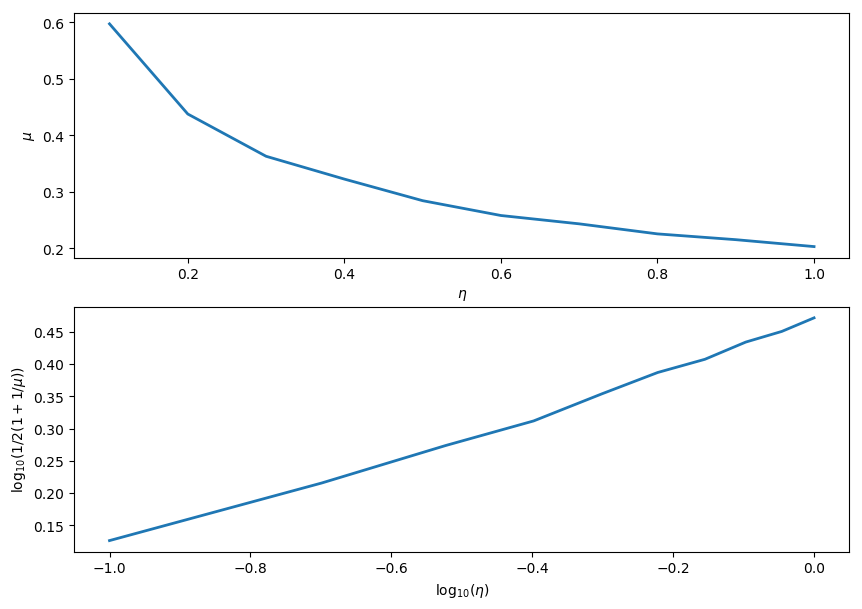

In [7]:
# run -i nt_solutions/sparsity_6_l1_recovery/exo1
include("Exos\\sparsity_6_l1_recovery\\exo1.jl")

In [8]:
## Insert your code here.

Support and Sign-based Criteria
-------------------------------
In the following we will consider the support
$$ \text{supp}(x_0) = \enscond{i}{x_0(i) \neq 0} $$
of the vector $x_0$. The co-support is its complementary $I^c$.

In [8]:
supp   = s -> find(abs(s) .> 1e-5) #I'm not sure if the function find in Julia has the same function as the one in Matlab
cosupp = s -> find(abs(s) .< 1e-5)

(::#15) (generic function with 1 method)

Given some support $ I \subset \{0,\ldots,N-1\} $, we will denote as
$ \Phi = (\phi_m)_{m \in I} \in \RR^{N \times \abs{I}}$ the
sub-matrix extracted from $\Phi$ using the columns indexed by $I$.


J.J. Fuchs introduces a criteria $F$ for identifiability that depends on the
sign of $x_0$.


J.J. Fuchs. _Recovery of exact sparse representations in the presence of
bounded noise._ IEEE Trans. Inform. Theory, 51(10), p. 3601-3608, 2005


Under the condition that $\Phi_I$ has full rank, the $F$ measure
of a sign vector $s \in \{+1,0,-1\}^N$ with $\text{supp}(s)=I$ reads
$$ \text{F}(s) = \norm{ \Psi_I s_I }_\infty
      \qwhereq \Psi_I = \Phi_{I^c}^* \Phi_I^{+,*} $$
where $ A^+ = (A^* A)^{-1} A^* $ is the pseudo inverse of a
matrix $A$.


The condition
$$ \text{F}(\text{sign}(x_0))<1 $$
implies that $x_0$ is identifiable, and also implies to robustess to
small noise. It does not however imply robustess to a bounded noise.


Compute $\Psi_I$ matrix.

In [9]:
# PsiI = (Phi, I) -> np.dot(np.transpose(Phi[:,np.setdiff1d(np.arange(0,np.shape(Phi)[1]), I)]),np.transpose(linalg.pinv(Phi[:,I])))

PsiI = (Phi,I) -> Phi[:, setdiff(1:size(Phi)[2], I)]' * pinv(Phi[:,I])';


Compute $\text{F}(s)$.

In [10]:
# F = (Phi, s) -> norm(np.dot(PsiI(Phi, supp(s)),s[supp(s)]), np.float("inf"))

F = (Phi, s) -> norm(PsiI(Phi, supp(s))*s[supp(s)], Inf)


(::#19) (generic function with 1 method)

The Exact Recovery Criterion (ERC) of a support $I$,
introduced by Tropp in


J. A. Tropp. _Just relax: Convex programming methods for identifying
sparse signals._ IEEE Trans. Inform. Theory, vol. 52, num. 3, pp. 1030-1051, Mar. 2006.


Under the condition that $\Phi_I$ has full rank, this condition reads
$$ \text{ERC}(I) = \norm{\Psi_{I}}_{\infty,\infty}
      =  \umax{j \in I^c} \norm{ \Phi_I^+ \phi_j }_1. $$
where $\norm{A}_{\infty,\infty}$ is the $\ell^\infty-\ell^\infty$
operator norm of a matrix $A$.

In [11]:
# erc = (Phi, I) -> linalg.norm(PsiI(Phi, I), np.float("inf"))
erc =(Phi, I) -> norm(PsiI(Phi,I), Inf)

(::#21) (generic function with 1 method)

The condition
$$ \text{ERC}(\text{supp}(x_0))<1 $$
implies that $x_0$ is identifiable, and also implies to robustess to
small and bounded noise.


One can prove that the ERC is the maximum of the F criterion for all signs of the given
support
$$ \text{ERC}(I) = \umax{ s, \text{supp}(s) \subset I } \text{F}(s). $$


The weak-ERC is an approximation of the ERC using only the correlation
matrix
$$ \text{w-ERC}(I) = \frac{
      \umax{j \in I^c} \sum_{i \in I} \abs{\dotp{\phi_i}{\phi_j}}
 }{
      1-\umax{j \in I} \sum_{i \neq j \in I} \abs{\dotp{\phi_i}{\phi_j}}
 }$$

In [12]:
# g = lambda C,I: np.sum(C[:,I], 1)
# werc_g = lambda g,I,J: np.max(g[J])/(1-np.max(g[I]))
# werc = lambda Phi,I: werc_g(g(Correlation(Phi), I), I, np.setdiff1d(np.arange(0,np.shape(Phi)[1]), I))

g = (C, I) -> sum(C[:,I], 2)
werc_g = (g, I, J) -> maximum(g[J]) / (1 - maximum(g[I]))
werc = (Phi, I) -> werc_g(g(Correlation(Phi), I), I, setdiff(1:size(Phi)[2], I) )




(::#27) (generic function with 1 method)

One has, if $\text{w-ERC}(I)>0$,  for $ I = \text{supp}(s) $,
$$ \text{F}(s) \leq \text{ERC}(I) \leq \text{w-ERC}(I) \leq
      \text{Coh}(\abs{I}). $$


This shows in particular that the condition
$$ \text{w-ERC}(\text{supp}(x_0))<1 $$
implies identifiability and robustess to small and bounded noise.

__Exercise 2__

Show that this inequality holds on a given matrix.
What can you conclude about the sharpness of these criteria ?

In [13]:
# run -i nt_solutions/sparsity_6_l1_recovery/exo2

include("Exos\\sparsity_6_l1_recovery\\exo2.jl")



N = 2000, P = 1990, |I| = 6
F(s)     = 0.20
ERC(I)   = 0.23
w-ERC(s) = 0.26
Coh(|s|) = 1.42


In [14]:
## Insert your code here.

N = 2000
P = N - 10
Phi = PhiRand(N, P)
s = zeros(N)
s[1:6] = 1
I = supp(s)
k = length(I)

println(@sprintf("N = %d, P = %d, |I| = %d", N, P, k))
println(@sprintf("F(s)     = %.2f",  F(Phi, s)))
println(@sprintf("ERC(I)   = %.2f",  erc(Phi, I)))
println(@sprintf("w-ERC(s) = %.2f", werc(Phi, I)))
println(@sprintf("Coh(|s|) = %.2f", Coh(Phi, k)))

N = 2000, P = 1990, |I| = 6
F(s)     = 0.23
ERC(I)   = 0.26
w-ERC(s) = 0.30
Coh(|s|) = 1.53


__Exercise 3__

For a given matrix $\Phi$ generated using PhiRand, draw as a function of the sparsity $k$
the probability that a random sign vector $s$ of sparsity
$\norm{s}_0=k$ satisfies the conditions $\text{F}(x_0)<1$,
$\text{ERC}(x_0)<1$ and $\text{w-ERC}(x_0)<1$

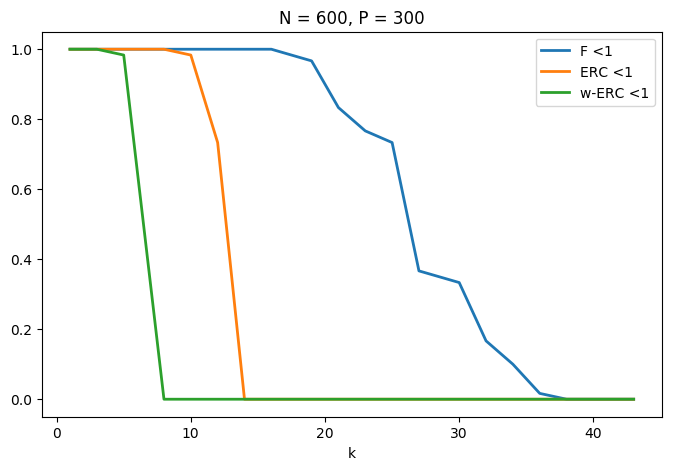

In [15]:
# run -i nt_solutions/sparsity_6_l1_recovery/exo3
include("Exos\\sparsity_6_l1_recovery\\exo3.jl")


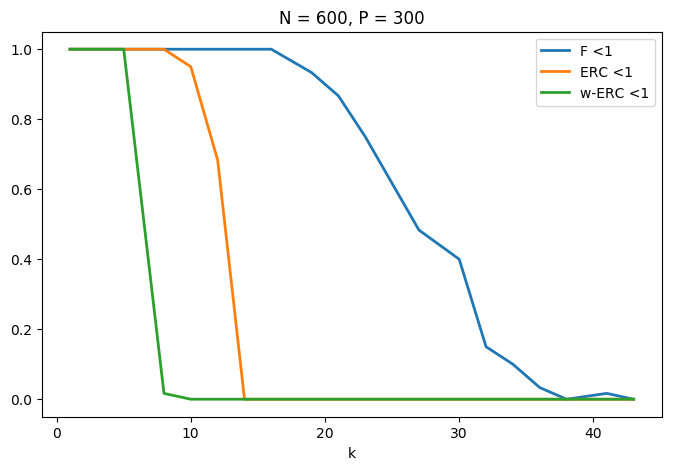

In [16]:
## Insert your code here.

N = 600
P = Int(N/2)
Phi = PhiRand(P, N)
klist = Array{Int64,1}(round(linspace(1, P/7., 20)))
ntrials = 60
proba = zeros(length(klist), 3)

for i in 1:length(klist)
    proba[i, 1:3] = 0
    k = Int(klist[i])
    for j in 1:ntrials
        s = zeros(N)
        I = randperm(N)
        I = I[1:k]
        l = randn(k, 1)
        s[I] = l./abs(l)
        proba[i, 1] = proba[i, 1] + (F(Phi, s) .< 1)
        proba[i, 2] = proba[i, 2] + (erc(Phi, I) .< 1)
        proba[i, 3] = proba[i, 3] + (werc(Phi, I) .> 0).*(werc(Phi, I) .< 1)
    end
end
        
figure(figsize = (8, 5))
plot(klist, proba/ntrials, linewidth = 2)
xlabel("k")
legend(["F <1", "ERC <1", "w-ERC <1"])
title(@sprintf("N = %d, P = %d", N, P))
show()

Restricted Isometry Criteria
----------------------------
The restricted isometry constants $\de_k^1,\de_k^2$ of a matrix $\Phi$ are the
smallest $\de^1,\de^2$ that satisfy
$$ \forall x \in \RR^N, \quad \norm{x}_0 \leq k \qarrq
      (1-\de^1)\norm{x}^2 \leq \norm{\Phi x}^2 \leq (1+\de^2)\norm{x}^2.  $$


E. Candes shows in


E. J. Cand s. _The restricted isometry property and its implications for
compressed sensing_. Compte Rendus de l'Academie des Sciences, Paris, Serie I, 346 589-592


that if
$$ \de_{2k} \leq \sqrt{2}-1 ,$$
then $\norm{x_0} \leq k$ implies identifiability as well as robustness to small and bounded noise.


The stability constant $\la^1(A), \la^2(A)$ of a matrix
$A = \Phi_I$ extracted from $\Phi$ is the smallest $\tilde \la_1,\tilde \la_2$ such that
$$ \forall \al \in \RR^{\abs{I}}, \quad
      (1-\tilde\la_1)\norm{\al}^2 \leq \norm{A \al}^2 \leq (1+\tilde \la_2)\norm{\al}^2.  $$


These constants $\la^1(A), \la^2(A)$ are easily computed from the
largest and smallest eigenvalues of $A^* A \in \RR^{\abs{I} \times \abs{I}}$

In [17]:
minmax = v -> (1 - minimum(v), maximum(v) - 1)
ric = A -> minmax(eig(A'*A)[1])

(::#31) (generic function with 1 method)

The restricted isometry constant of $\Phi$ are computed as the largest
stability constants of extracted matrices
$$ \de^\ell_k = \umax{ \abs{I}=k } \la^\ell( \Phi_I ).  $$


The eigenvalues of $\Phi$ are essentially contained in the
interval $ [a,b] $ where $a=(1-\sqrt{\be})^2$ and $b=(1+\sqrt{\be})^2$
with $\beta = k/P$
More precisely, as $k=\be P$ tends to infinity, the distribution of the
eigenvalues tends to the Marcenko-Pastur law
$ f_\be(\la) = \frac{1}{2\pi \be \la}\sqrt{ (\la-b)^+ (a-\la)^+ }. $

__Exercise 4__

Display, for an increasing value of $k$ the histogram of repartition
of the eigenvalues $A^* A$ where $A$ is a Gaussian matrix of size $(P,k)$ and
variance $1/P$. For this, accumulate the eigenvalues for many
realizations of $A$.

 in depwarn(::String, ::Symbol) at .\deprecated.jl:64
 in #hist!#996(::Bool, ::Function, ::Array{Int64,1}, ::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:629
 in hist(::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:644
 in macro expansion; at .\In[21]:26 [inlined]
 in anonymous at .\<missing>:?
 in include_string(::String, ::String) at .\loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\Ayman\.julia\v0.5\IJulia\src\execute_request.jl:157
 in eventloop(::ZMQ.Socket) at C:\Users\Ayman\.julia\v0.5\IJulia\src\eventloop.jl:8
 in (::IJulia.##13#19)() at .\task.jl:360
while loading In[21], in expression starting on line 15
 in depwarn(::String, ::Symbol) at .\deprecated.jl:64
 in #hist!#996(::Bool, ::Function, ::Array{Int64,1}, ::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:629
 in hist(::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:644
 in macro expansion; at .\In[21]:26 [inlined]
 in anonymous at .\<missing>:?
 in include_string(::

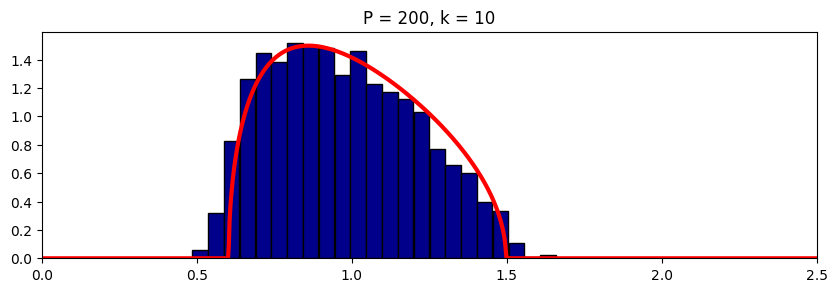

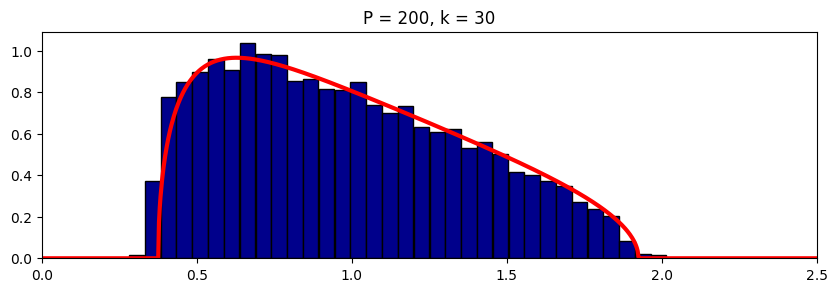

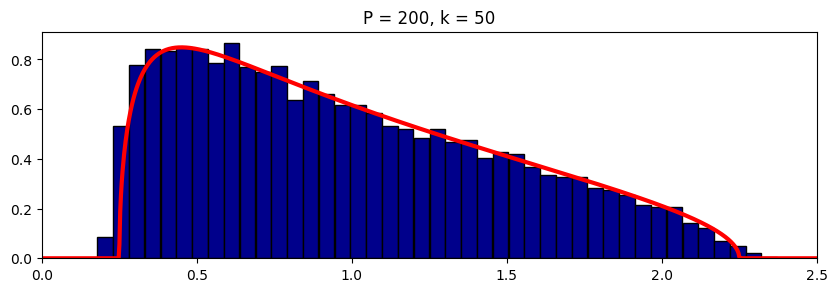

 in depwarn(::String, ::Symbol) at .\deprecated.jl:64
 in #hist!#996(::Bool, ::Function, ::Array{Int64,1}, ::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:629
 in hist(::Array{Any,1}, ::LinSpace{Float64}) at .\deprecated.jl:644
 in macro expansion; at .\In[21]:26 [inlined]
 in anonymous at .\<missing>:?
 in include_string(::String, ::String) at .\loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\Ayman\.julia\v0.5\IJulia\src\execute_request.jl:157
 in eventloop(::ZMQ.Socket) at C:\Users\Ayman\.julia\v0.5\IJulia\src\eventloop.jl:8
 in (::IJulia.##13#19)() at .\task.jl:360
while loading In[21], in expression starting on line 15


In [21]:
# run -i nt_solutions/sparsity_6_l1_recovery/exo4

# include("Exos\\sparsity_6_l1_recovery\\exo4.jl")

klist = [10, 30, 50]
P = 200
ntrials = 200
tmin = 0
tmax = 2.5
q = 50
t = linspace(tmin, tmax, q)
t1 = linspace(tmin, tmax, 1000)
dt = (tmax - tmin)/q

for j in 1 : length(klist)
    k = klist[j]
    
    # simulation    
    v = []
    for i in 1 : ntrials
        v = [v; svd(randn(P, k)./sqrt(P))[2].^2]
    end
    
    figure(figsize = (10, 10))
    subplot(length(klist), 1, j)
    h = hist(v, t)[2]
    h = h/sum(h)/dt
    h = [h; 0]
    bar(t[1 : end], h, width = 1/20, color = "darkblue", edgecolor = "black")
    
    # theoritical law
    beta = k/P
    a = (1 - sqrt(beta))^2
    b = (1 + sqrt(beta))^2
    z = sqrt(max(t1 - a, zeros(length(t1))).*max(b - t1, zeros(length(t1))))./(2*pi.*beta.*t1)
    
    plot(t1, z, "r", linewidth = 3)
    xlim(tmin, tmax)
    ylim(0, maximum(h)*1.05)
    title(@sprintf("P = %d, k = %d", P, k))
    
    show()
end

In [20]:
## Insert your code here.

__Exercise 5__

Estimate numerically lower bound on $\de_k^1,\de_k^2$ by Monte-Carlo
sampling of sub-matrices.

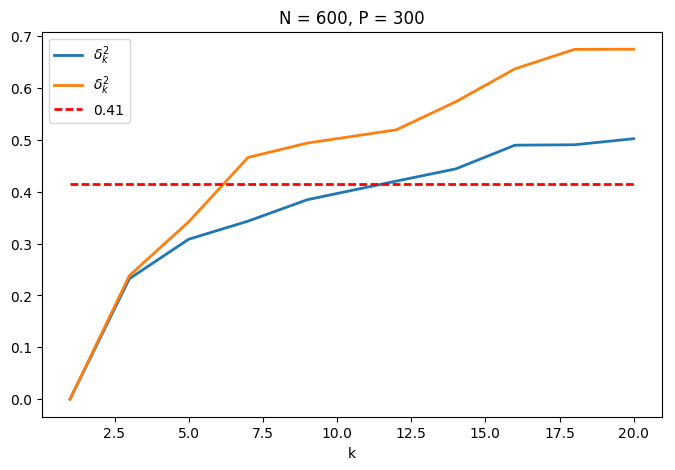

In [22]:
# run -i nt_solutions/sparsity_6_l1_recovery/exo5

include("Exos\\sparsity_6_l1_recovery\\exo5.jl")



In [22]:
## Insert your code here.

Sparse Spikes Deconvolution
---------------------------
We now consider a convolution dictionary $ \Phi $.
Such a dictionary is used with sparse regulariz


Second derivative of Gaussian kernel $g$ with a given variance $\si^2$.

In [39]:
# sigma = 6

# g = x -> (1-x.^2./sigma^2).*exp(-x.^2./(2*sigma^2))



sigma = 6
g = x -> (1 - x.^2./sigma^2).*exp(-x.^2./(2*sigma^2))


(::#37) (generic function with 1 method)

Create a matrix $\Phi$ so that $\Phi x = g \star x$ with periodic
boundary conditions.

In [49]:
# include("ndgrid.jl")
# P = 1024
# (Y, X) = meshgrid(0:P-1, 0:P-1)
# Phi = normalize(g((X - Y + P/2.)%P-P/2.))  # I'm not sure of the % symbol


include("ndgrid.jl")
P = 1024
(Y, X) = meshgrid(0:P-1, 0:P-1)
Phi = normalize(g((X - Y + P/2.)%P-P/2.))
Phi






1024×1024 Array{Float64,2}:
  0.354084    0.3395      0.297733   …  -0.0        -0.0        -0.0      
  0.3395      0.354084    0.3395        -0.0        -0.0        -0.0      
  0.297733    0.3395      0.354084      -0.0        -0.0        -0.0      
  0.234359    0.297733    0.3395        -0.0        -0.0        -0.0      
  0.157516    0.234359    0.297733      -0.0        -0.0        -0.0      
  0.0764539   0.157516    0.234359   …  -0.0        -0.0        -0.0      
  0.0         0.0764539   0.157516      -0.0        -0.0        -0.0      
 -0.0647419   0.0         0.0764539     -0.0        -0.0        -0.0      
 -0.11322    -0.0647419   0.0           -0.0        -0.0        -0.0      
 -0.143693   -0.11322    -0.0647419     -0.0        -0.0        -0.0      
 -0.156963   -0.143693   -0.11322    …  -0.0        -0.0        -0.0      
 -0.155728   -0.156963   -0.143693      -0.0        -0.0        -0.0      
 -0.14376    -0.155728   -0.156963      -0.0        -0.0        -0.0    

{T<:Any, 1}) in module Main at C:\Users\Ayman\.julia\v0.5\ndgrid.jl:3 overwritten at C:\Users\Ayman\.julia\v0.5\ndgrid.jl:3.


To improve the conditionning of the dictionary, we sub-sample its atoms,
so that $ P = \eta N > N $.

In [50]:
eta = 2
N = P/eta
Phi = Phi[:, 1:eta:end]


1024×512 Array{Float64,2}:
  0.354084    0.297733    0.157516   …  -0.0        -0.0        -0.0      
  0.3395      0.3395      0.234359      -0.0        -0.0        -0.0      
  0.297733    0.354084    0.297733      -0.0        -0.0        -0.0      
  0.234359    0.3395      0.3395        -0.0        -0.0        -0.0      
  0.157516    0.297733    0.354084      -0.0        -0.0        -0.0      
  0.0764539   0.234359    0.3395     …  -0.0        -0.0        -0.0      
  0.0         0.157516    0.297733      -0.0        -0.0        -0.0      
 -0.0647419   0.0764539   0.234359      -0.0        -0.0        -0.0      
 -0.11322     0.0         0.157516      -0.0        -0.0        -0.0      
 -0.143693   -0.0647419   0.0764539     -0.0        -0.0        -0.0      
 -0.156963   -0.11322     0.0        …  -0.0        -0.0        -0.0      
 -0.155728   -0.143693   -0.0647419     -0.0        -0.0        -0.0      
 -0.14376    -0.156963   -0.11322       -0.0        -0.0        -0.0     

Plot the correlation function associated to the filter.
Can you determine the value of the coherence $\mu(\Phi)$?

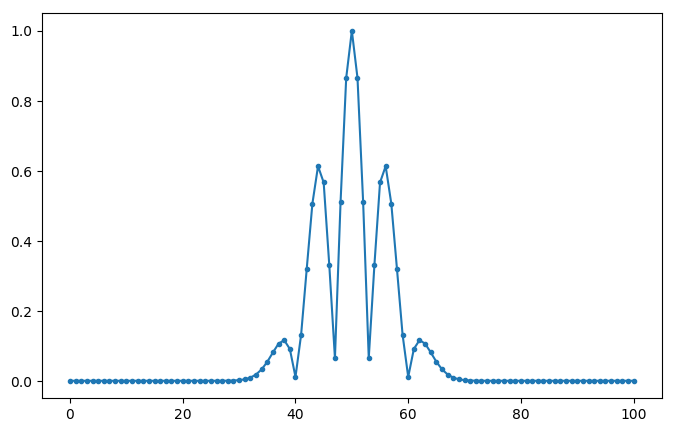

In [51]:
c = Phi'*Phi
c = abs(c[:, Int(size(c)[2]/2)])
# c = abs(c[:, Int(size(c)[1]/2)])
# Int(size(c)[1]/2)


figure(figsize = (8, 5))
plot(c[Base.div(length(c), 2) - 50 : Base.div(length(c), 2) + 50], ".-")
show()

Create a data a sparse $x_0$ with two diracs of opposite signes with spacing $d$.

In [68]:
# twosparse = d -> np.roll(np.concatenate(([1.], np.zeros(d), [-1.], np.zeros(N-d-2))), int(N/2 - d/2))
twosparse = d -> circshift([1; zeros(d, 1); -1; zeros(Int(N) - d - 2, 1)], round(N/2 - d/2))


(::#51) (generic function with 1 method)

Display $x_0$ and $\Phi x_0$.

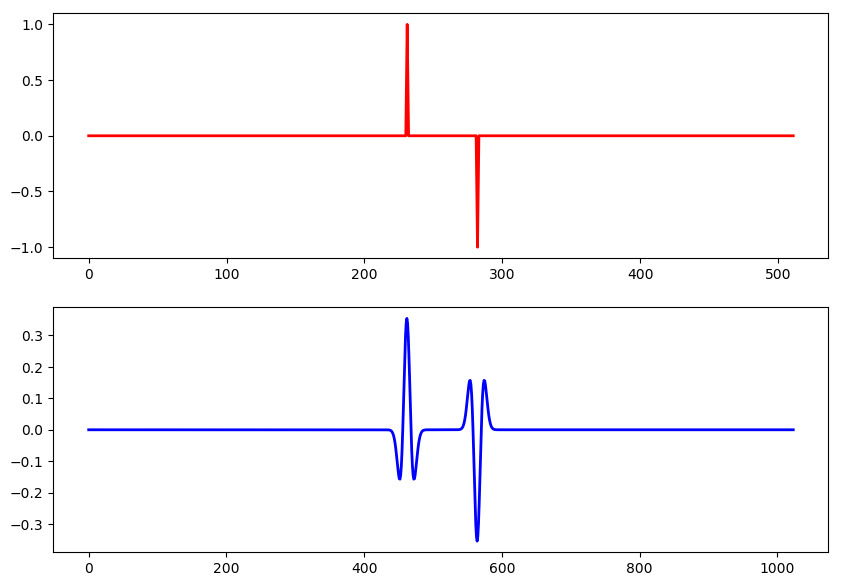

In [76]:
x0 = twosparse(50)


figure(figsize = (10, 7))
subplot(2, 1, 1)
plot(x0[:], "r", linewidth = 2)
subplot(2, 1, 2)
plot((Phi*x0)[:], "b", linewidth = 2)
show()

__Exercise 6__

Plot the evolution of the criteria F, ERC and Coh as a function of $d$.
Do the same plot for other signs patterns for $x_0$.
Do the same plot for a Dirac comb with a varying spacing $d$.

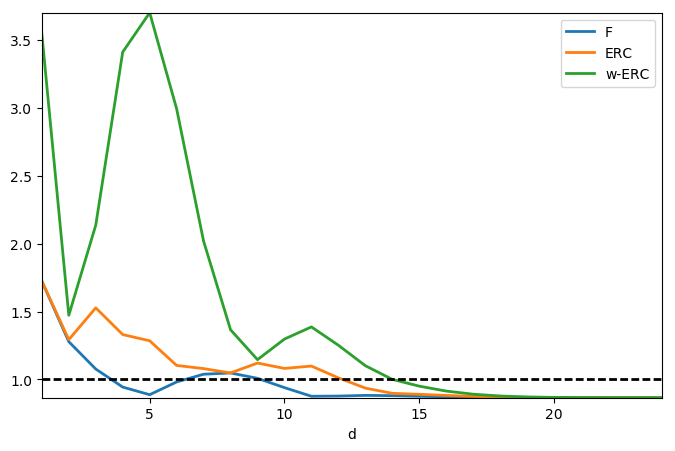

In [93]:
# run -i nt_solutions/sparsity_6_l1_recovery/exo6

g = (C, I) -> sum(C[:, I], 2)

figure(figsize = (8, 5))
dlist = Array{Int64,1}(1 : N/20 - 1)
criter = zeros(length(dlist), 3)

for i in 1 : length(dlist)
    s = twosparse(dlist[i])
    I = (supp(s))
    criter[i, :] = [F(Phi, s), erc(Phi,I), werc(Phi,I)]
end
    
criter[criter .< 0] = float("inf")

plot(dlist, criter, linewidth = 2)
plot(dlist, dlist.*0 + 1, "k--", linewidth = 2)
xlim(1, maximum(dlist))
ylim(minimum(criter), maximum(criter))
xlabel("d")
legend(["F", "ERC", "w-ERC"])
           
show()

#########


# i = 1

# s = twosparse(dlist[i])


In [30]:
## Insert your code here.